In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

### Импортируем наш датасет из CSV файла и создадим dataframe

**Запишем датафрейм в переменную df и отобразим первые 5 строк**

In [2]:
df = pd.read_csv('./data.csv')
df.head()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low


## Описание
Данный датасет содержит информацию по уровню адаптации учащихся в онлайн-образовании.

## Датасет содержит следующие фичи:
### Главная фича (центральная):  
Adaptivity level - уровень адаптивности
### Набор других фичей:  

 - Gender - пол   
 - Age - возраст
 - Education Level - уровень образования
 - Institution Type - тип образовательного учреждения
 - IT Student - ИТ-студент (имеет ли такое образвоание)
 - Location in Town - проживает в городе
 - Load-shedding - скорость загрузки
 - Financial Condition - финансовое положение
 - Internet Type - тип интернет соединения
 - Network Type - тип сети
 - Class Duration - продолжительность занятия
 - Self LMS - самостоятельная система управления обучением
 - Device - устройство
 
*На основе данного датасета можно получить представление об эффективности онлайн-образования*

**Выведем размерность датасета**

In [3]:
df.shape

(1205, 14)

Датасет имеет 14 атрибутов и 1205 строк данных

**Посмотрим какие у атрибутов типы данных**

In [4]:
df.dtypes

Gender                 object
Age                    object
Education Level        object
Institution Type       object
IT Student             object
Location               object
Load-shedding          object
Financial Condition    object
Internet Type          object
Network Type           object
Class Duration         object
Self Lms               object
Device                 object
Adaptivity Level       object
dtype: object

В датасете отсутсвуют числовые данные, только категориальные. Поэтому, я переведу данные вручную

**Посмотрим количество пустых значений**

In [5]:
df.isna().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

Датасет не имеет пустых значений - это значит, что нам не нужно заполнять пустоты данными или удалять строки

**Выведем кол-во уникальных полей в каждом столбце**

In [6]:
df.nunique(axis=0)

Gender                 2
Age                    6
Education Level        3
Institution Type       2
IT Student             2
Location               2
Load-shedding          2
Financial Condition    3
Internet Type          2
Network Type           3
Class Duration         3
Self Lms               2
Device                 3
Adaptivity Level       3
dtype: int64

Заметим, что весь датасет состоит из классифицированных столбцов с небольшим колличеством уникальных значений

**Основная описательная статистика в одной таблице**

In [7]:
df.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
count,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205,1205
unique,2,6,3,2,2,2,2,3,2,3,3,2,3,3
top,Boy,21-25,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
freq,663,374,530,823,901,935,1004,878,695,775,840,995,1013,625


**Посмотрим на распределение уровней адаптации по студентам**

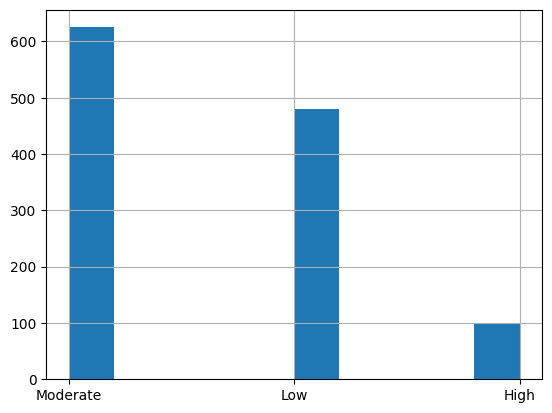

In [8]:
df['Adaptivity Level'].hist();

Можно сделать вывод, что больше всего встречается средняя адаптация, а меньше всего встречается сильно адаптированные студенты.

**Посмотрим на распределение уровней адаптации по студентам у которых 4G интернет**

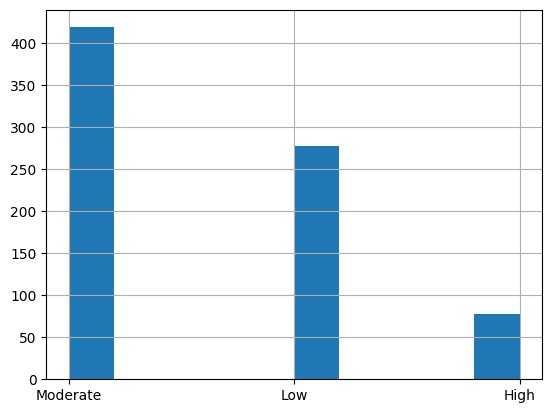

In [9]:
df[df["Network Type"] == "4G"]['Adaptivity Level'].hist();

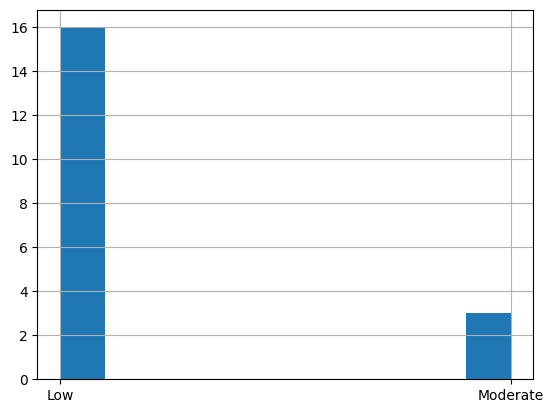

In [10]:
df[df["Network Type"] == "2G"]['Adaptivity Level'].hist();

Исходя из построенных графиков, имеет смысл посмотреть на все возможные варианты отношения фичей к показателю уровня адаптации студентов. 

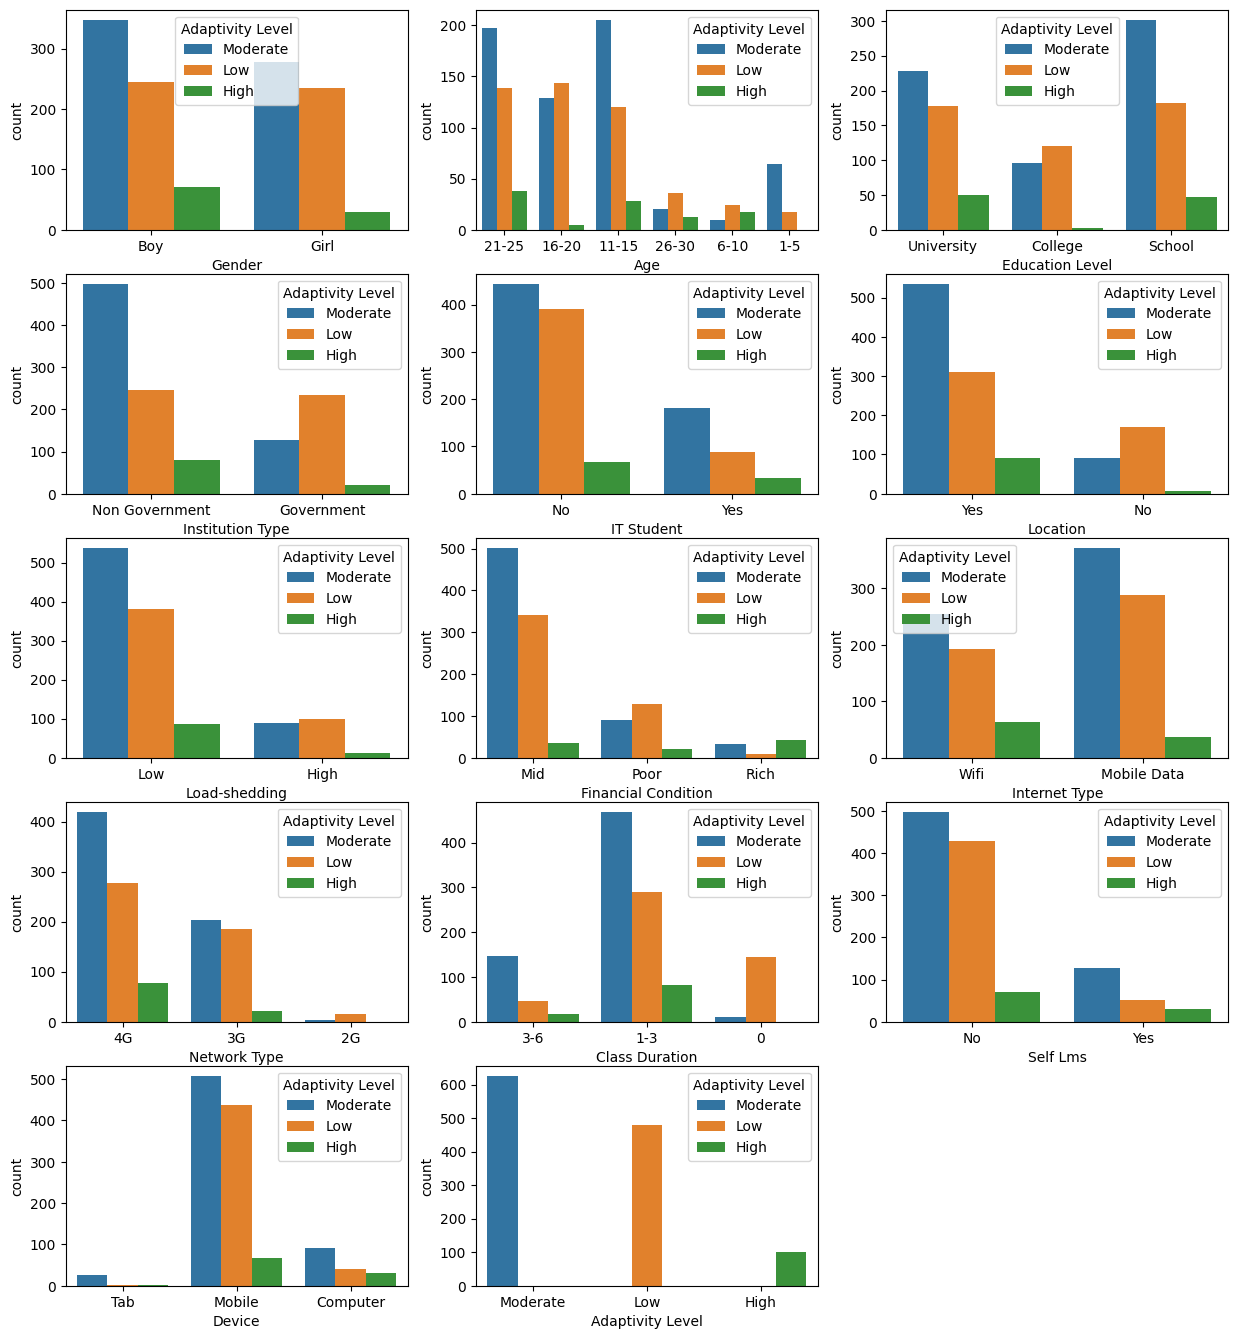

In [11]:
plot_number = 0
plt.figure(figsize = (15,20))
for column in df:
    plot_number = plot_number + 1
    plt.subplot(6,3,plot_number)
    sns.countplot(x=column, hue='Adaptivity Level', data=df)

### Выводы из полученных графиков: 
1. Мужчины легче адаптируются к новым знаниям. При этом низкий уровень адаптации примерно одинаков у мужчин и женщин. 
2. Те, кто обучаются в школах и университах имеют равный показатель, соотвествующий среднему уровню адаптации. При этом, те кто обучаются в школе склонны иметь высокий уровень адаптации чаще, чем другие группы обучающихся. А те, кто обучался в колледже не склонен иметь высокий урвоень адаптации вовсе, такие студенты преимущественно имеют средний или низкий (в большей части) уровень адапатации.
3. Самая высокая адаптация проявляется в возрасте 11-15 и 21-25. Самая низкая адапатация наблюдается после 26 лет, а также в возрасте от 16 до 20 лет. Плохую адаптацию можно объяснить социальными и физиологическими факторами (чем ниже эти факторы, тем хуже уровень адапатации).
4. Высокий уровень адапатции (усвоения материала)наблюдается у среднего класса. А также высокий уровень адаптации чаще всего встрчается у людей, которые живут в городской среде. 
5. Качество интернета оказывает влияние на уровень адапатации студента (чем лучше интрнет, тем выше уровень адапатации) 
6. Те, студенты, которые проходят обучение, подлючившись к Wi-Fi сети, имеют более высокий уровень адапатации, чем студенты, который используют мобильный интернет.

### Построим матрицу корреляций 

Для построения матрицы корреляций нам понадобится перевести наши данный в тип float или int.
Для этого воспользуемся category_encoders, который переведет наши категории в float и дополнительно масштабирует данные. 

In [12]:
import category_encoders as ce
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [13]:
X = df.drop('Adaptivity Level', axis=1)
y = le.fit_transform(df["Adaptivity Level"])

In [14]:
encoder = ce.target_encoder.TargetEncoder()

In [15]:
df_float = encoder.fit_transform(X, y)

In [16]:
df_float.describe()

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000
mean,1.435685,1.436823,1.435685,1.435685,1.435685,1.435685,1.435685,1.435742,1.435685,1.437984,1.435685,1.435685,1.433245
std,0.021460,0.167601,0.040445,0.104255,0.031639,0.068961,0.027999,0.177859,0.054106,0.017001,0.152929,0.014239,0.046299
min,1.416290,0.887443,1.390351,1.282723,1.417314,1.307407,1.373134,0.894931,1.372549,1.303729,1.064936,1.429146,1.382716
25%,1.416290,1.425134,1.390351,1.282723,1.417314,1.472727,1.448207,1.285124,1.372549,1.440000,1.459524,1.429146,1.433366
50%,1.416290,1.446043,1.424658,1.506683,1.417314,1.472727,1.448207,1.529613,1.482014,1.440000,1.459524,1.429146,1.433366
75%,1.459410,1.501416,1.479245,1.506683,1.490132,1.472727,1.448207,1.529613,1.482014,1.440389,1.459524,1.429146,1.433366
max,1.459410,1.789330,1.479245,1.506683,1.490132,1.472727,1.448207,1.529613,1.482014,1.440389,1.611374,1.466667,1.702021


Теперь мы получили таблицу из чисел и может посчитать корреляцию

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
df_float["Adaptivity Level"] = y

In [20]:
df_float.corr().style.background_gradient(cmap='coolwarm')

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
Gender,1.000000,0.088732,0.121599,0.106910,-0.233284,-0.034231,0.059998,0.021639,0.021589,-0.072990,-0.013278,-0.138331,0.039507,0.033426
Age,0.088732,1.000000,0.265251,0.207532,-0.111820,0.121275,0.015649,0.102425,0.107895,0.081793,0.134794,-0.036805,0.024472,0.267004
Education Level,0.121599,0.265251,1.000000,0.179598,-0.489270,0.230385,0.225322,-0.120491,0.290942,0.023336,-0.125535,-0.446889,-0.006446,0.062997
Institution Type,0.106910,0.207532,0.179598,1.000000,0.104185,0.326813,-0.017794,-0.003917,-0.060198,0.086673,0.357288,0.096722,-0.002796,0.162387
IT Student,-0.233284,-0.111820,-0.489270,0.104185,1.000000,0.009697,-0.186005,0.015295,-0.113452,0.044564,0.193883,0.453429,-0.167600,0.049282
Location,-0.034231,0.121275,0.230385,0.326813,0.009697,1.000000,0.245380,-0.071934,-0.222660,0.154356,0.277752,-0.036443,0.014697,0.107414
Load-shedding,0.059998,0.015649,0.225322,-0.017794,-0.186005,0.245380,1.000000,-0.025021,0.013199,0.120684,-0.060577,-0.187610,0.053384,0.043611
Financial Condition,0.021639,0.102425,-0.120491,-0.003917,0.015295,-0.071934,-0.025021,1.000000,0.018794,0.006568,-0.050457,0.065768,0.009145,0.277305
Internet Type,0.021589,0.107895,0.290942,-0.060198,-0.113452,-0.222660,0.013199,0.018794,1.000000,-0.037235,-0.190429,-0.084661,-0.031878,0.084276
Network Type,-0.072990,0.081793,0.023336,0.086673,0.044564,0.154356,0.120684,0.006568,-0.037235,1.000000,-0.018079,0.025576,-0.078362,0.054788


Однозначно опредилить сильно коррелирующие данные не удалось

### Выполним обучение и проверим качество модели

**Воспользуемся моделью линейной регрессии**

In [21]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

Разделим данные на обучающую и тестовую выборку

In [22]:
X = df_float.drop('Adaptivity Level', axis=1)

In [23]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X.values, y, test_size=0.2,
                                                          random_state=17)

In [24]:
Liner = LinearRegression()
Logistic = LogisticRegression()

Liner.fit(X_train, y_train)
Logistic.fit(X_train, y_train)

c:\Users\bulat\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
print('Liner R^2: {0}'.format(Liner.score(X_train, y_train)))
print('Logistic R^2: {0}'.format(Logistic.score(X_train, y_train)))

Liner R^2: 0.22515507454991324
Logistic R^2: 0.6773858921161826


In [26]:
print('Liner R^2: {0}'.format(Liner.score(X_holdout, y_holdout)))
print('Logistic R^2: {0}'.format(Logistic.score(X_holdout, y_holdout)))

Liner R^2: 0.15392600018716474
Logistic R^2: 0.6639004149377593


### Вывод:
Линейная регрессия показала плохой результат. Его можно объяснить тем, что в матрице корреляции не прослеживается прямого влияния фичей на целевой показатель.
Логистическая регрессия показала результат гораздо лучше, но он все-равно далек от идеала.

### Примечание 
Не удалось провести аналитику по выбросам и использовать Z-оценку, так как датаест не содержит генеральной совокупности в числовом формате, только в категориальном. 